In [6]:
# -*- coding: utf-8 -*-
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import sklearn.datasets

np.random.seed(0)
X, y = sklearn.datasets.make_moons(200,noise=0.2)

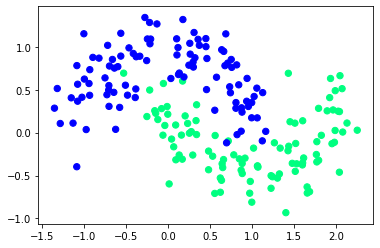

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap='winter')

C:\Users\khthe\.conda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.97


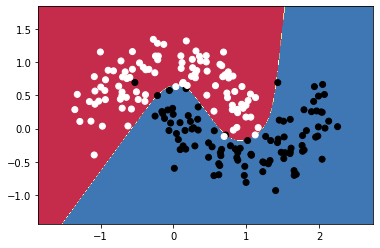

In [7]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)


#our class must extend nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #Our network consists of 3 layers. 1 input, 1 hidden and 1 output layer
        #This applies Linear transformation to input data. 
        self.fc1 = nn.Linear(2,3)
        
        #This applies linear transformation to produce output data
        self.fc2 = nn.Linear(3,2)
        
    #This must be implemented
    def forward(self,x):
        #Output of the first layer
        x = self.fc1(x)
        #Activation function is Relu. Feel free to experiment with this
        x = torch.tanh(x)
        #This produces output
        x = self.fc2(x)
        return x
        
    #This function takes an input and predicts the class, (0 or 1)        
    def predict(self,x):
        #Apply softmax to output
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)
        

#Initialize the model        
model = Net()
#Define loss criterion
criterion = nn.CrossEntropyLoss()
#Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#Number of epochs
epochs = 50000
#List to store losses
losses = []
for i in range(epochs):
    #Precit the output for Given input
    y_pred = model.forward(X)
    #Compute Cross entropy loss
    loss = criterion(y_pred,y)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()
    

from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X),y))
    

def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()



    
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)
    
    
plot_decision_boundary(lambda x : predict(x) ,X.numpy(), y.numpy())

In [72]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(20,noise=0.2)
y

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

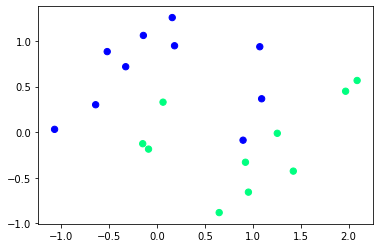

In [73]:
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap='winter')

In [74]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float().view(20,1)


In [75]:
model = torch.nn.Sequential(
    nn.Linear(2,3),
    torch.nn.ReLU(),
    nn.Linear(3,1),
    torch.nn.Sigmoid(),
)
 

In [79]:
criterion = nn.BCEWithLogitsLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 5000 
losses = []
for i in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred,y)
    if i % 100 == 0:
        losses.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

#### Die Oder-Funktion

In [109]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
x = torch.tensor([0,0,0,1,1,0,1,1]).view(4,1,2).float()
y = torch.tensor([0,1,1,1]).view(4,1,1)
 
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss(reduction='mean')

for epoch in range(1000):
    yhat = model(x)
    loss = loss_fn(y, yhat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

model(x)

tensor([[[0.2895]],

        [[0.8389]],

        [[0.8303]],

        [[0.9843]]], grad_fn=<SigmoidBackward>)

#### Die Und-Funktion

In [120]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
x = torch.tensor([0,0,0,1,1,0,1,1]).view(4,1,2).float()
y = torch.tensor([0,0,0,1]).view(4,1,1)
 
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss(reduction='mean')

for epoch in range(2000):
    yhat = model(x)
    loss = loss_fn(y, yhat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(model(x))
print(*model.parameters())



tensor([[[0.0158]],

        [[0.1884]],

        [[0.1884]],

        [[0.7706]]], grad_fn=<SigmoidBackward>)
Parameter containing:
tensor([[2.6724, 2.6725]], requires_grad=True) Parameter containing:
tensor([-4.1330], requires_grad=True)


#### Die XOR-Funktion

In [135]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(2,3),
    nn.ReLU(),
    nn.Linear(3,1),
    nn.Sigmoid()
)
x = torch.tensor([0,0,0,1,1,0,1,1]).view(4,1,2).float()
y = torch.tensor([0,1,1,0]).view(4,1,1)
 
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss(reduction='mean')

for epoch in range(2000):
    yhat = model(x)
    loss = loss_fn(y, yhat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

model(x)

tensor([[[0.0947]],

        [[0.9313]],

        [[0.9240]],

        [[0.0613]]], grad_fn=<SigmoidBackward>)

In [136]:
print(*model.parameters())

Parameter containing:
tensor([[ 2.2735,  2.2736],
        [ 1.4515,  1.6663],
        [-1.0563, -0.8362]], requires_grad=True) Parameter containing:
tensor([-2.2739e+00,  1.9034e-04,  1.0564e+00], requires_grad=True) Parameter containing:
tensor([[-3.8567,  2.1239, -1.5844]], requires_grad=True) Parameter containing:
tensor([-0.5843], requires_grad=True)


In [146]:
import math

def relu2(x1,x2,w1,w2,b):
    z = x1*w1 + x2*w2 + b
    return max(0,z)

def sigmoid3(x1,x2,x3,w1,w2,w3,b):
    z = x1*w1+x2*w2+x3*w3+b
    return  1/(1+math.exp(-1.0*z))

x1, x2 = 1, 1
a1 = relu2(x1,x2,2.2735,2.2736,-2.2739e+00)
a2 = relu2(x1,x2,1.4515,1.6663,1.9034e-04)
a3 = relu2(x1,x2,-1.0563,-0.8362,1.0564e+00)
a4 = sigmoid3(a1,a2,a3,-3.8567,2.1239,-1.5844,-0.5843)
 
a1, a2, a3, a4

(2.2732000000000006, 3.11799034, 0, 0.061280745690316864)

In [ ]:
1.9034e-04